# Learning and predicting

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [3]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [6]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [7]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
clf.predict(digits.data[-1:])

array([8])

In [9]:
digits.data[-1:]

array([[  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.,   0.,   2.,  16.,
         14.,   6.,   1.,   0.,   0.,   0.,   0.,  15.,  15.,   8.,  15.,
          0.,   0.,   0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.,   0.,
          0.,  12.,  15.,  15.,  12.,   0.,   0.,   0.,   4.,  16.,   6.,
          4.,  16.,   6.,   0.,   0.,   8.,  16.,  10.,   8.,  16.,   8.,
          0.,   0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.]])

# Model persistence

In [10]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [12]:
y[0]

0

# Type Casting

In [13]:
import numpy as np
from sklearn import random_projection

In [14]:
rng = np.random.RandomState(0)
X = rng.rand(10,2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [15]:
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [16]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [18]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

# Refitting and updating parameters

In [20]:
import numpy as np
from sklearn.svm import SVC

In [21]:
rng = np.random.RandomState(0)
X = rng.rand(100,10)
y = rng.binomial(1,0.5,100)
X_test = rng.rand(5,10)

In [22]:
clf = SVC()
clf.set_params(kernel='linear').fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [24]:
clf.set_params(kernel='rbf').fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

## Statistical learning: the setting and estimator object in scikit-learn


In [26]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150L, 4L)

## Supervised Learning: predicting an output variable from high-dimensional observations

In [33]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

k-Nearest neighbors classifier

In [34]:
# Split iris data in train and test data
# A random permutation, to split data randomly

np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [37]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Linear model: from regression to sparsity

In [38]:
# Diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.data[:-20]
diabetes_y_test  = diabetes.data[-20:]

In [40]:
# Linear Regression

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print(regr.coef_)

[[  1.00000000e+00   1.24048585e-16   1.31841954e-16   2.12508210e-16
    7.71569382e-18   1.01047394e-16   7.27983563e-17  -1.53770531e-16
    4.07635884e-17   1.92588619e-17]
 [  9.82507466e-17   1.00000000e+00   1.66533454e-16   1.11022302e-16
   -1.11022302e-16  -2.22044605e-16   2.63677968e-16   1.66533454e-16
   -1.66533454e-16   0.00000000e+00]
 [ -4.91253733e-17   4.99600361e-16   1.00000000e+00   1.94289029e-16
    8.46545056e-16  -1.11022302e-16  -1.07552856e-16  -9.02056208e-17
   -3.74700271e-16  -1.38777878e-17]
 [  3.93002986e-16   5.55111512e-17   5.55111512e-17   1.00000000e+00
   -3.88578059e-16   5.82867088e-16   4.78783679e-16  -1.24900090e-16
    5.55111512e-17   1.66533454e-16]
 [  1.43282339e-16   5.55111512e-17   4.85722573e-16   0.00000000e+00
    1.00000000e+00  -7.91033905e-16  -3.05311332e-16   4.16333634e-17
    8.32667268e-17  -5.55111512e-17]
 [  1.88313931e-16  -3.88578059e-16   5.55111512e-17   3.60822483e-16
   -6.52256027e-16   1.00000000e+00  -3.15719

In [42]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

1.8582388670962644e-33

In [43]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between X and Y

regr.score(diabetes_X_test, diabetes_y_test)

1.0

In [53]:
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0,2].T
regr = linear_model.LinearRegression()

In [54]:
import pylab as pl
pl.figure()

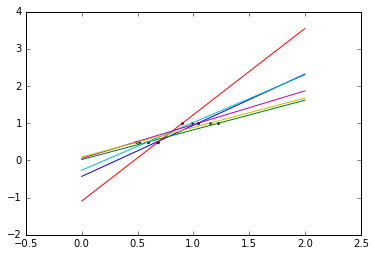

In [55]:
np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

In [56]:
regr = linear_model.Ridge(alpha=.1)
pl.figure()

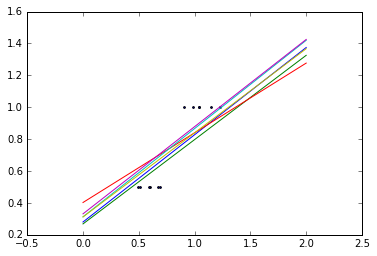

In [57]:
np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X
    regr.fit(this_X,y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)